In [37]:
import os 
import numpy as np
import pandas as pd

from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

In [38]:
import seaborn as sns
# import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager # to solve: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.

import scanpy as sc

In [39]:
import sys
sys.path.append('../../')

import utils

In [40]:
from downstream.multisection import compute_lisi

In [41]:
coll = ['#8dd3c7','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#cccccc','#ccebc5']
sns.color_palette(coll)



[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8, 0.8, 0.8),
 (0.8, 0.9215686274509803, 0.7725490196078432)]

In [42]:
true_domains = ['Layer_3', 'Layer_4', 'Layer_5', 'Layer_6', 'WM','nan']
_palette = dict(zip(true_domains, coll[:len(true_domains)]))

# Config

In [43]:
# set global rc parameters
utils.config_rc(dpi=300, font_size=6)
# mpl.rcParams
wk_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))

In [44]:
# multisection data result root path
data_root = utils.get_path('multisection_wk_root_path', json_path=os.path.join(wk_root, '_data.json'))

# 151669-151672

In [45]:
_data_path =  os.path.join(data_root,"DLPFC/DLPFC_1516_69_72/")

In [46]:
# all methods ressults
_results = os.path.join(_data_path,'merge_all.h5ad')

In [47]:
adata = sc.read_h5ad(_results)

In [48]:
adata

AnnData object with n_obs × n_vars = 15284 × 16454
    obs: 'in_tissue', 'array_row', 'array_col', 'celltype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'batch', 'SpaSEG_discrete_clusters', 'SpaSEG_clusters', 'ground_truth_code', 'SpaSEG_batch_clusters', 'X_pca_leiden_0.2', 'X_Harmony_leiden_0.2', 'SpaSEG_embedding_leiden_0.2', 'H_liger_leiden_0.2', 'X_pca_leiden_0.3', 'X_Harmony_leiden_0.3', 'SpaSEG_embedding_leiden_0.3', 'H_liger_leiden_0.3', 'X_pca_leiden_0.4', 'X_Harmony_leiden_0.4', 'SpaSEG_embedding_leiden_0.4', 'H_liger_leiden_0.4', 'X_pca_leiden_0.5', 'X_Harmony_leiden_0.5', 'SpaSEG_embedding_leiden_0.5', 'H_liger_leiden_0.5', 'X_pca_leiden_0.6', 'X_Harmony_leiden_0.6', 'SpaSEG_embedding_leiden_0.6', 'H_liger_leiden_0.6', 'X_pca_leiden_0.7', 'X_Harmony_l

In [49]:
adata.obs['SpaSEG_discrete_clusters'] = adata.obs['SpaSEG_discrete_clusters'].astype('category')
adata.obs['SpaSEG_clusters'] = adata.obs['SpaSEG_clusters'].astype(int).astype('category')

In [50]:
_adata = adata[adata.obs['batch']=='151669']
_adata.obs['SpaSEG_discrete_clusters']

AAACAAGTATCTCCCA-1-0_151669_151669    16
AAACACCAATAACTGC-1-0_151669_151669    16
AAACAGAGCGACTCCT-1-0_151669_151669     2
AAACAGGGTCTATATT-1-0_151669_151669     8
AAACATTTCCCGGATT-1-0_151669_151669     1
                                      ..
TTGTTGTGTGTCAAGA-1-0_151669_151669     2
TTGTTTCACATCCAGG-1-0_151669_151669     1
TTGTTTCATTAGTCTA-1-0_151669_151669     1
TTGTTTCCATACAACT-1-0_151669_151669     8
TTGTTTGTGTAAATTC-1-0_151669_151669     2
Name: SpaSEG_discrete_clusters, Length: 3661, dtype: category
Categories (5, int64): [1, 2, 7, 8, 16]

/home/baiyong/.local/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


[<AxesSubplot: title={'center': 'SpaSEG_discrete_clusters'}, xlabel='spatial1', ylabel='spatial2'>]

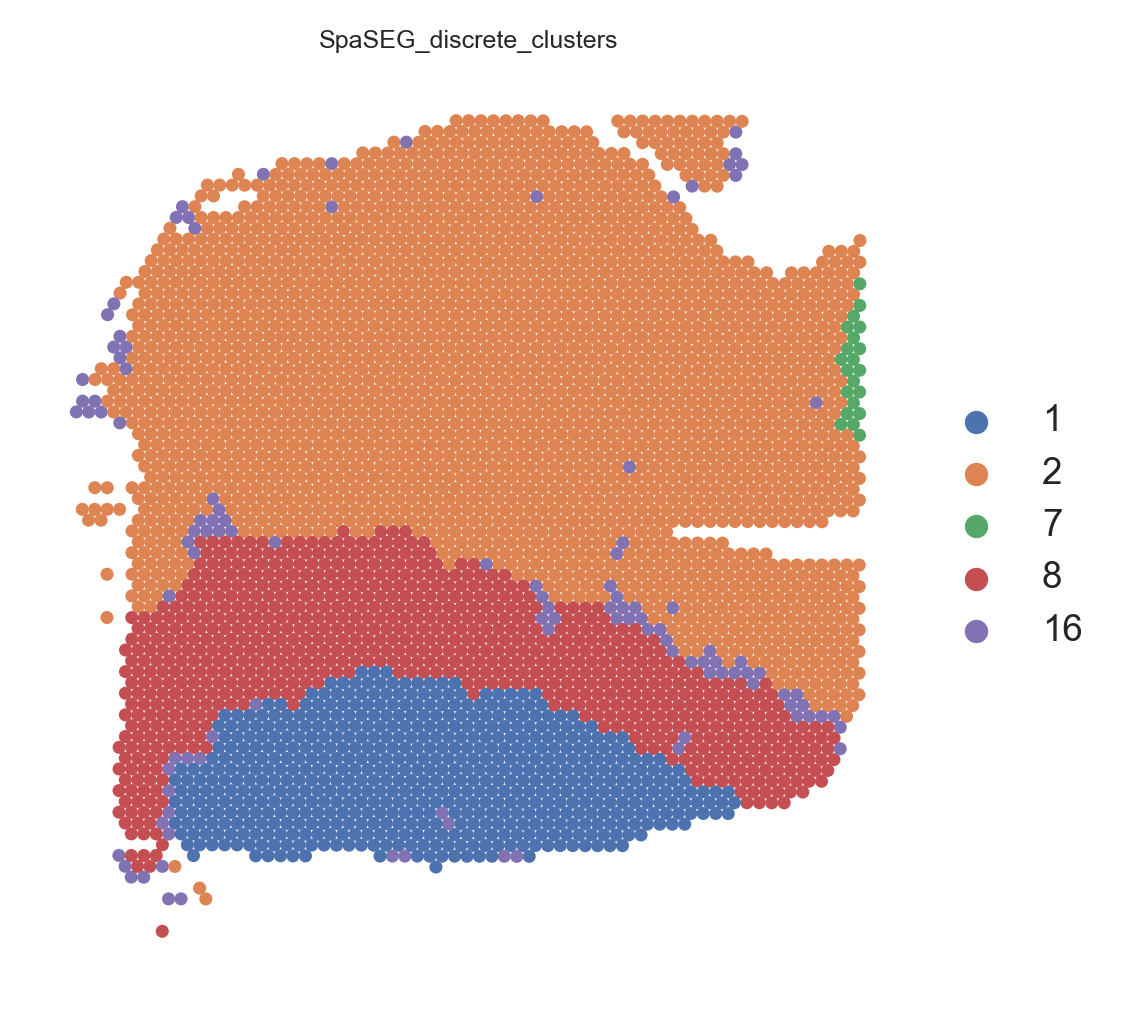

In [51]:
sc.pl.spatial(_adata, color="SpaSEG_discrete_clusters", show=False, spot_size =96.40082438014726,size=1.5, img_key=None, frameon=False)

In [52]:
_adata = adata[adata.obs['batch']=='151671']
_adata.obs['SpaSEG_discrete_clusters']

AAACAAGTATCTCCCA-1-2_151671_151671     8
AAACACCAATAACTGC-1-2_151671_151671     1
AAACAGAGCGACTCCT-1-2_151671_151671     2
AAACAGCTTTCAGAAG-1-2_151671_151671     8
AAACAGGGTCTATATT-1-2_151671_151671     8
                                      ..
TTGTTTCACATCCAGG-1-2_151671_151671     1
TTGTTTCATTAGTCTA-1-2_151671_151671     1
TTGTTTCCATACAACT-1-2_151671_151671     8
TTGTTTGTATTACACG-1-2_151671_151671    16
TTGTTTGTGTAAATTC-1-2_151671_151671     2
Name: SpaSEG_discrete_clusters, Length: 4110, dtype: category
Categories (4, int64): [1, 2, 8, 16]

/home/baiyong/.local/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


[<AxesSubplot: title={'center': 'SpaSEG_discrete_clusters'}, xlabel='spatial1', ylabel='spatial2'>]

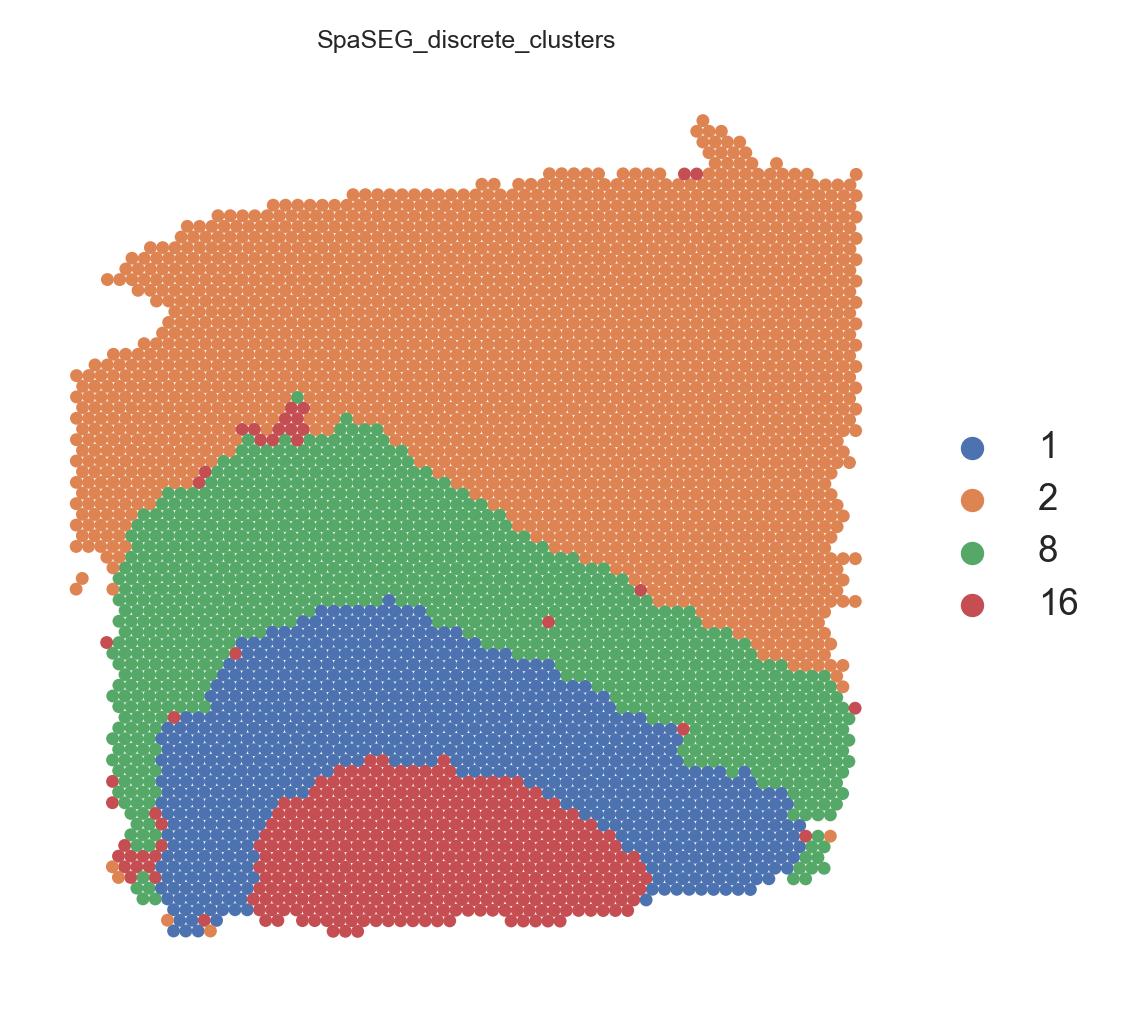

In [53]:
sc.pl.spatial(_adata, color="SpaSEG_discrete_clusters", show=False, spot_size =96.40082438014726,size=1.5, img_key=None, frameon=False)

In [54]:
SpaSEG_discrete_clusters_map ={1:'Layer_6',2:'Layer_3',7:'nan',8:'Layer_5',16:'WM'}
_SpaSEG_labels = [1,2,7,8,16] # values from adata.obs['SpaSEG_discrete_clusters'].cat.categories
SpaSEG_labels_dict = dict(zip(_SpaSEG_labels, range(len(_SpaSEG_labels))))
adata.obs['SpaSEG_clusters'] = adata.obs['SpaSEG_discrete_clusters'].map(SpaSEG_labels_dict).astype('category')


In [55]:
sample_ids = ['151669', '151670', '151671', '151672']
n_sample = len(sample_ids)

In [56]:
# spaseg_labels = adata.obs['SpaSEG_clusters'].cat.categories 
# col_map = dict(zip(spaseg_labels, coll[:len(spaseg_labels)]))

spaseg_labs1 = {0:'Layer_6',1:'Layer_3',2:'nan',3:'Layer_5',4:'WM'}
col_map = {item:_palette[val] for (item, val) in spaseg_labs1.items()} 


/home/baiyong/.local/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/baiyong/.local/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/baiyong/.local/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/baiyong/.local/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


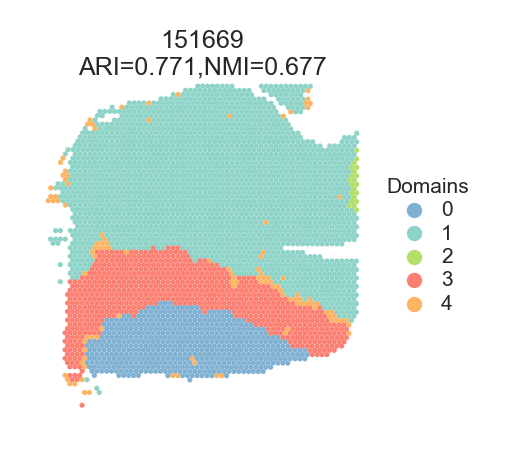

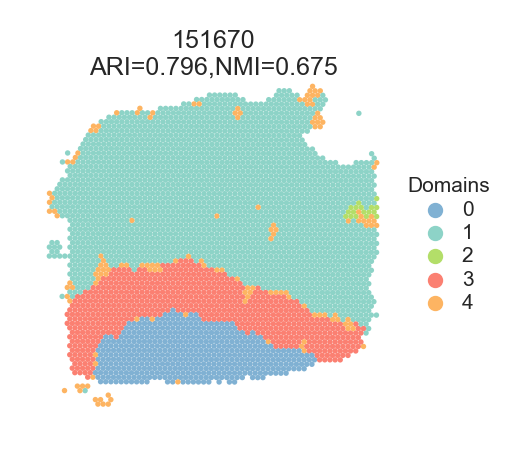

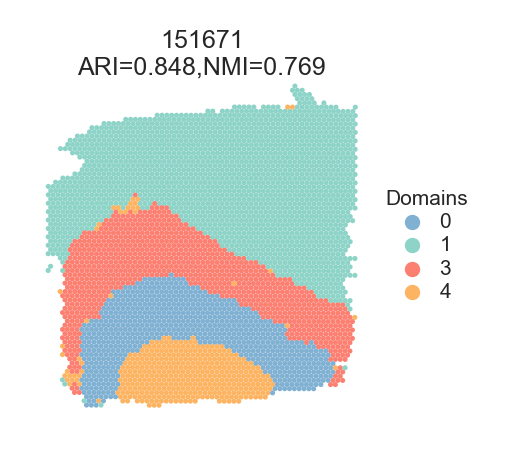

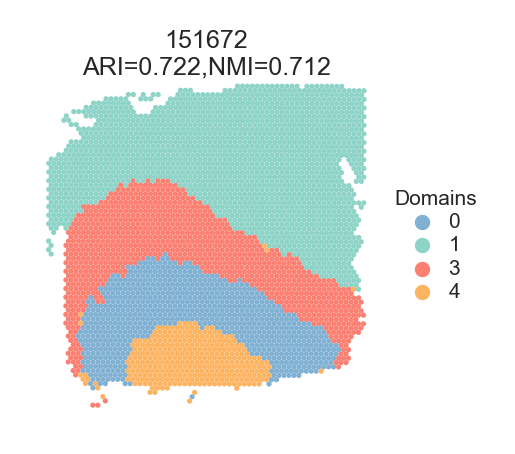

In [57]:
for i, _sample_id in enumerate(sample_ids):
    _adata = adata[adata.obs['batch']==_sample_id]
    ground_truth = _adata.obs['celltype'].astype("category").cat.codes.values
    spaseg_clusters = _adata.obs['SpaSEG_clusters'].values
    ari = adjusted_rand_score(ground_truth,spaseg_clusters)
    nmi = normalized_mutual_info_score(ground_truth,spaseg_clusters)
    fig,ax = plt.subplots(figsize=(utils.centimeter*4, utils.centimeter*4))
    sc.pl.spatial(_adata, color="SpaSEG_clusters", show=False, palette=col_map, ax=ax, spot_size =96.40082438014726,size=1.5, img_key=None, frameon=False)
    ax.set_title('{0}\nARI={1:.3f},NMI={2:.3f}'.format(_sample_id, ari,nmi),pad=0, y=0.98)
    
    leg = ax.legend(loc='center left', bbox_to_anchor=[0.98, 0.5], ncol=1, frameon=False, 
           markerscale=0.6, labelspacing=0.2, fontsize=5,
          handleheight= 0.8, handlelength=1,title='Domains')
    leg.get_title().set_fontsize('5')
    plt.savefig(os.path.join(wk_root, f"notebook/results/Multisection/Supp_baseline_spatial_{_sample_id}.pdf"), bbox_inches='tight', format='pdf', dpi=300)

In [58]:
colss = adata.obs['SpaSEG_clusters'].map(col_map)

<ipython-input-86-d1d0aa4c2f90>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),
<ipython-input-86-d1d0aa4c2f90>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),rotation=-10,ha='left',va='baseline', rotation_mode="anchor")
<ipython-input-86-d1d0aa4c2f90>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=42,ha='right', va='center', rotation_mode="anchor")


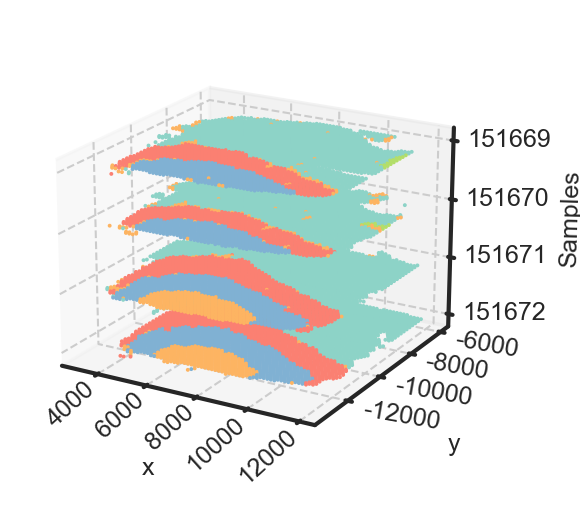

In [86]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
fig = plt.figure(figsize=(utils.centimeter*5, utils.centimeter*5))
ax = fig.add_subplot(projection='3d')

for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis._axinfo["grid"]['linewidth'] = .5
    axis._axinfo["grid"]['linestyle'] = "--"
#     axis._axinfo['tick']['inward_factor'] =0.05
#     axis._axinfo['tick']['outward_factor'] =0.05
#     axis._axinfo['tick']['width'] = 0.25
    
# for axis in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:
#     axis.line.set_linewidth(0.8)
#     axis.line.set_color('grey')

x,y = adata.obsm['spatial'][:,0],adata.obsm['spatial'][:,1]*-1
# x,y = adata.obs['array_row'],adata.obs['array_col']
z = (-adata.obs["batch"].cat.codes+4)
ax.scatter(x, y, z, c = colss, s=3.5, marker='.',alpha=1, rasterized=True, edgecolors='none')
ax.view_init(20)

ax.set_zticks([1,2,3,4])
ax.set_zticklabels(sample_ids[::-1],ha='left',va='center')
ax.zaxis.set_tick_params(pad=-6)
ax.set_zlabel('Samples', labelpad=-3)

ax.set_yticklabels(ax.get_yticklabels(), 
                verticalalignment='baseline',
                horizontalalignment='left')
# ax.set_yticks([-12000,-10000,-8000, -6000,-4000])
ax.set_yticklabels(ax.get_yticklabels(),rotation=-10,ha='left',va='baseline', rotation_mode="anchor")
ax.yaxis.set_tick_params(pad=-5)
ax.set_ylabel('y',labelpad=-6)

ax.set_xticklabels(ax.get_xticklabels(),rotation=42,ha='right', va='center', rotation_mode="anchor")
ax.xaxis.set_tick_params(pad=-6)
ax.set_xlabel('x', labelpad=-8)
# ax.tick_params(which='both', pad=-4)
plt.savefig(os.path.join(wk_root, f"notebook/results/Multisection/Supp_baseline_3d_6972.pdf"), bbox_inches='tight', format='pdf', dpi=300)

# Compare methods

In [62]:
# here we just compare
method_list=["SpaSEG_embedding","X_Harmony","H_liger"]
title_list=["SpaSEG",'Harmony','LIGER']
# best_list=["SpaSEG_clusters","X_Harmony_leiden_0.65","H_liger_leiden_0.35"]
best_list=["SpaSEG_clusters","X_Harmony_leiden_0.65","H_liger_leiden_0.2"]

## Samples (Batch)

In [63]:
cols = utils.react_cols_10[:5]
cols.extend(utils.react_cols_10[7:9])
cols.append('#666666')
cols[0] = utils.norm_12[8]
sns.color_palette(cols)

[(0.34901960784313724, 0.32941176470588235, 0.8392156862745098),
 (0.1607843137254902, 0.6509803921568628, 0.20392156862745098),
 (0.8196078431372549, 0.596078431372549, 0.043137254901960784),
 (0.8274509803921568, 0.23921568627450981, 0.09019607843137255),
 (0.615686274509804, 0.24705882352941178, 0.615686274509804),
 (0.5568627450980392, 0.6941176470588235, 0.1450980392156863),
 (0.5803921568627451, 0.4, 0.2196078431372549),
 (0.4, 0.4, 0.4)]

SpaSEG_embedding


/home/baiyong/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


X_Harmony


/home/baiyong/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


H_liger


/home/baiyong/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


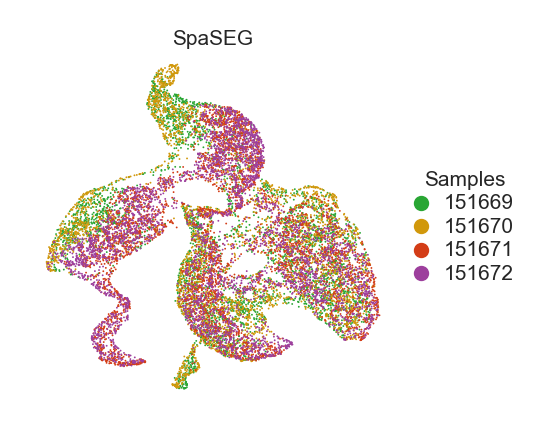

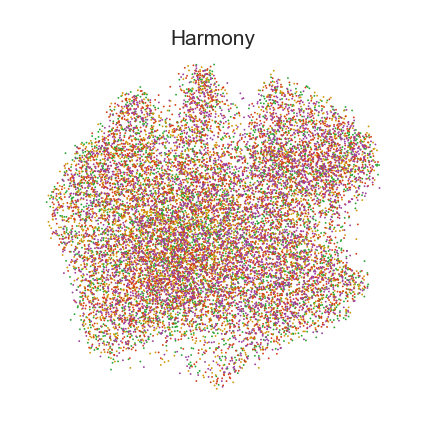

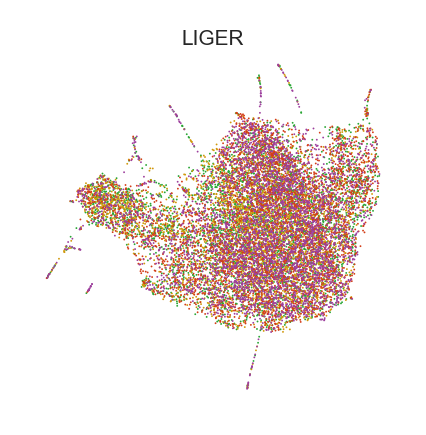

In [64]:
_palette_samples=dict(zip(sample_ids, cols[1:5]))
for i,(method,title) in enumerate(zip(method_list,title_list)):
    print(method)
    fig,ax = plt.subplots(figsize=(utils.centimeter*4, utils.centimeter*4))
    sc.tl.umap(adata, neighbors_key="neighbor_"+method)
    sc.pl.umap(adata, ax=ax, color='batch', palette=_palette_samples,
                          frameon=False,show=False,edgecolor='none',size=12000/len(adata.obs))
    # ax_b.set_title('SpaSEG clusters', pad=0, fontsize=7)
    ax.set_title(title,fontsize=5,pad=0)
    
    if i==0:
        leg = ax.legend(loc='center left', bbox_to_anchor=[1, 0.5], ncol=1, frameon=False, 
           markerscale=0.6, labelspacing=0.2, fontsize=5,
          handleheight= 0.8, handlelength=0.6,title='Samples')
        leg.get_title().set_fontsize('5')
    else:
        ax.get_legend().remove()
    plt.savefig(os.path.join(wk_root, f"notebook/results/Multisection/Supp_baseline_umap_batch_6972_{title}.pdf"), bbox_inches='tight', format='pdf', dpi=300)

## True domain

/home/baiyong/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/baiyong/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/baiyong/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


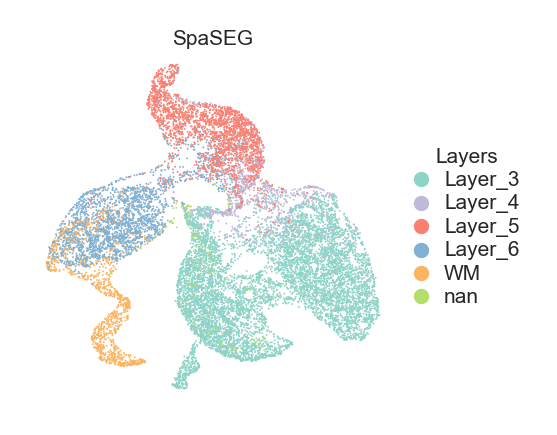

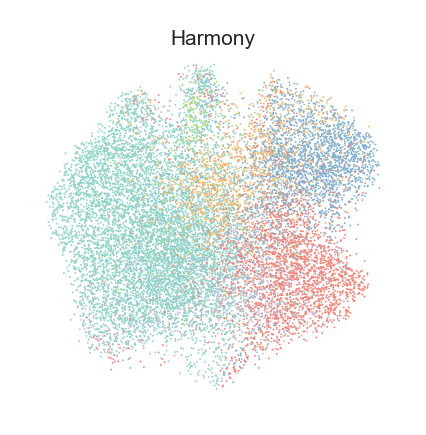

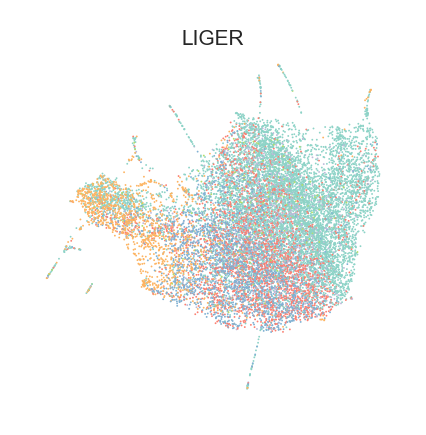

In [65]:
for i,(method,title) in enumerate(zip(method_list,title_list)):
    fig,ax = plt.subplots(figsize=(utils.centimeter*4, utils.centimeter*4))
    sc.tl.umap(adata, neighbors_key="neighbor_"+method)
    sc.pl.umap(adata, ax=ax, color='celltype', palette=_palette,
                          frameon=False,show=False,edgecolor='none',size=12000/len(adata.obs))
    # ax_b.set_title('SpaSEG clusters', pad=0, fontsize=7)
    ax.set_title(title,fontsize=5,pad=0)
    
    if i==0:
        leg = ax.legend(loc='center left', bbox_to_anchor=[1, 0.5], ncol=1, frameon=False, 
           markerscale=0.6, labelspacing=0.2, fontsize=5,
          handleheight= 0.8, handlelength=0.6,title='Layers')
        leg.get_title().set_fontsize('5')
    else:
        ax.get_legend().remove()
    plt.savefig(os.path.join(wk_root, f"notebook/results/Multisection/Supp_baseline_umap_layers_6972_{title}.pdf"), bbox_inches='tight', format='pdf', dpi=300)

/home/baiyong/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/baiyong/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/baiyong/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


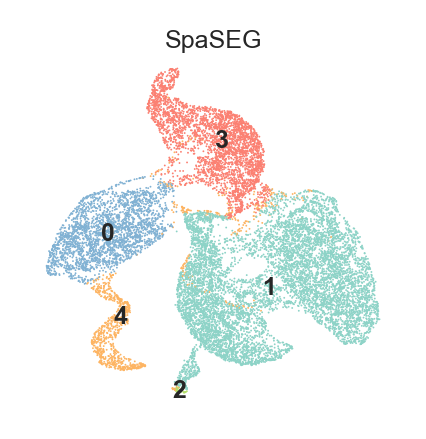

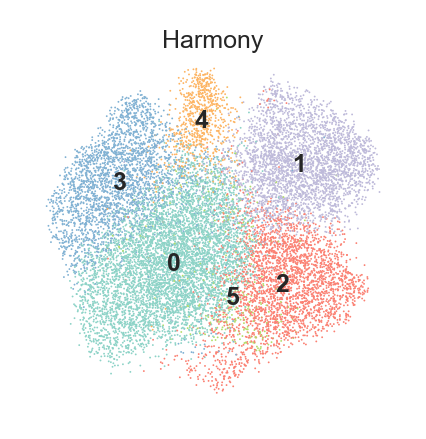

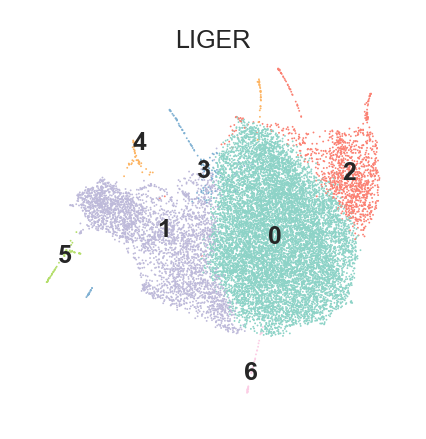

In [66]:
for i,(method,title) in enumerate(zip(method_list,title_list)):
    fig,ax = plt.subplots(figsize=(utils.centimeter*4, utils.centimeter*4))
    sc.tl.umap(adata, neighbors_key="neighbor_"+method)
    
    _palette = col_map
    if method != 'SpaSEG_embedding':
        _clusters = adata.obs[best_list[i]].values
        _label = np.sort(np.unique(_clusters))
        _palette = dict(zip(_label, coll[:len(_label)]))
#         _palette=None
    
    sc.pl.umap(adata, ax=ax, color=best_list[i], palette=_palette,legend_loc='on data',
                          frameon=False,show=False,edgecolor='none',size=12000/len(adata.obs))
    # ax_b.set_title('SpaSEG clusters', pad=0, fontsize=7)
    ax.set_title(title,fontsize=6,pad=0)
    
    plt.savefig(os.path.join(wk_root, f"notebook/results/Multisection/Supp_baseline_umap_6972_{title}_label.pdf"), bbox_inches='tight', format='pdf', dpi=300)

/home/baiyong/.local/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/baiyong/.local/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/baiyong/.local/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/baiyong/.local/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


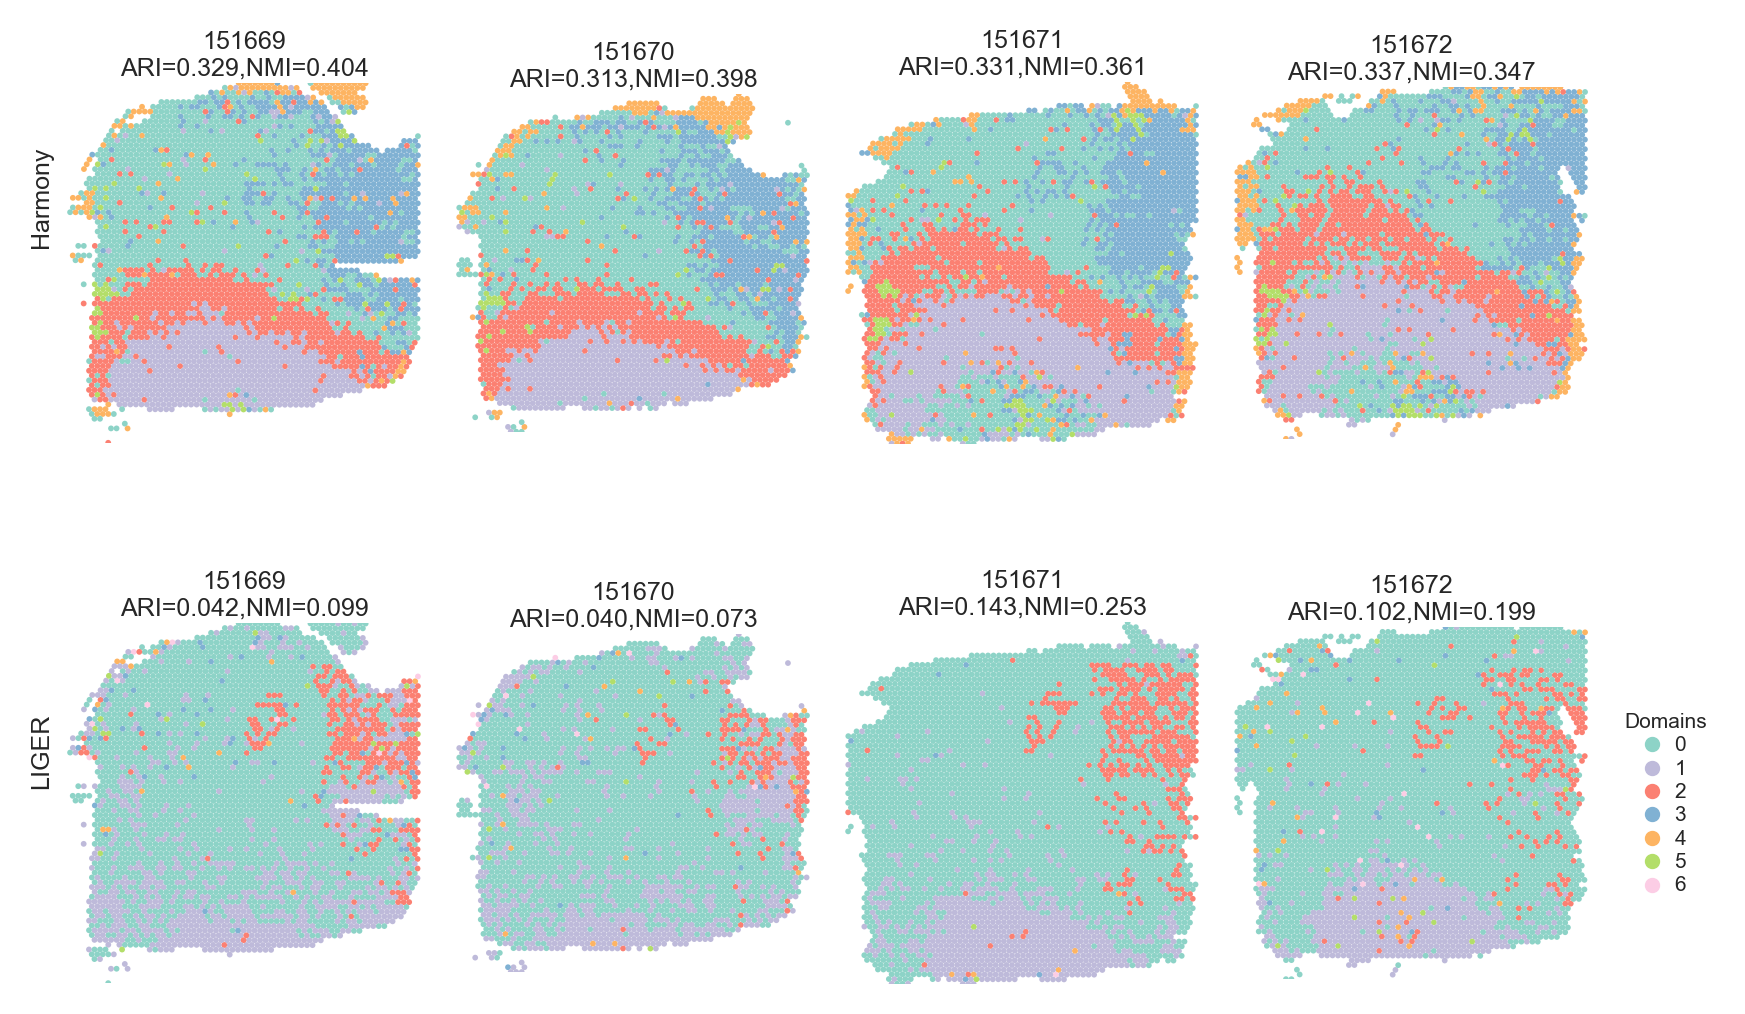

In [67]:
n_smaple = len(sample_ids)
n_algo = len(best_list[1:])
title_list=["SpaSEG",'Harmony','LIGER'][1:]
fig,axs = plt.subplots(n_algo, n_smaple, 
                       figsize=(utils.centimeter*17, utils.centimeter*6*n_algo),
                      gridspec_kw={'wspace': 0, 'hspace':0.02})
for j, _sample in enumerate(sample_ids):
    _adata = adata[adata.obs['batch']==_sample]
    ground_truth = _adata.obs['celltype'].astype("category").cat.codes.values
    for i,_algo in enumerate(best_list[1:]): 
        _title= title_list[i]
        _clusters = _adata.obs[_algo].values
        ari = adjusted_rand_score(ground_truth,_clusters)
        nmi = normalized_mutual_info_score(ground_truth,_clusters)
        _label = np.sort(np.unique(_clusters))
        _palette = dict(zip(_label, coll[:len(_label)]))
        sc.pl.spatial(_adata, color=_algo, show=False, palette=_palette, ax=axs[i,j],spot_size =96.40082438014726, size=1.5, img_key=None, frameon=False)
        
        axs[i,j].set_ylim(_adata.obsm['spatial'][:,1].max(),_adata.obsm['spatial'][:,].min())
        axs[i,j].set_title('{0}\nARI={1:.3f},NMI={2:.3f}'.format(_sample, ari,nmi),pad=2, y=1)
        if j==0:
#             print(_adata.obsm['spatial'][:,0].max(),_adata.obsm['spatial'][:,0].min(),_adata.obsm['spatial'][:,1].max(),_adata.obsm['spatial'][:,].min())
            axs[i,j].text(_adata.obsm['spatial'][:,0].min()-1000, _adata.obsm['spatial'][:,1].max()-5000, f'{_title}',rotation='vertical')
        
        if j == n_smaple-1 and i == n_algo-1:
            leg = axs[i,j].legend(loc='center left', bbox_to_anchor=[1, 0.5], ncol=1, frameon=False, markerscale=0.6, labelspacing=0.2, fontsize=5,
                            handleheight= 0.8, handlelength=0.6,title='Domains')
            leg.get_title().set_fontsize('5')
        else:
            axs[i,j].get_legend().remove()
plt.savefig(os.path.join(wk_root, f"notebook/results/Multisection/Supp_baseline_spatial_comp_methods_6972.pdf"), bbox_inches='tight', format='pdf', dpi=300)

# Calculate Metrics

In [68]:
adata

AnnData object with n_obs × n_vars = 15284 × 16454
    obs: 'in_tissue', 'array_row', 'array_col', 'celltype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'batch', 'SpaSEG_discrete_clusters', 'SpaSEG_clusters', 'ground_truth_code', 'SpaSEG_batch_clusters', 'X_pca_leiden_0.2', 'X_Harmony_leiden_0.2', 'SpaSEG_embedding_leiden_0.2', 'H_liger_leiden_0.2', 'X_pca_leiden_0.3', 'X_Harmony_leiden_0.3', 'SpaSEG_embedding_leiden_0.3', 'H_liger_leiden_0.3', 'X_pca_leiden_0.4', 'X_Harmony_leiden_0.4', 'SpaSEG_embedding_leiden_0.4', 'H_liger_leiden_0.4', 'X_pca_leiden_0.5', 'X_Harmony_leiden_0.5', 'SpaSEG_embedding_leiden_0.5', 'H_liger_leiden_0.5', 'X_pca_leiden_0.6', 'X_Harmony_leiden_0.6', 'SpaSEG_embedding_leiden_0.6', 'H_liger_leiden_0.6', 'X_pca_leiden_0.7', 'X_Harmony_l

## LISI

In [69]:
method_list=["SpaSEG_embedding","X_Harmony","H_liger"]
title_list=["SpaSEG",'Harmony','LIGER']
# best_list=["SpaSEG_clusters","X_Harmony_leiden_0.65","H_liger_leiden_0.35"]
best_list=["SpaSEG_clusters","X_Harmony_leiden_0.65","H_liger_leiden_0.2"]

In [70]:
from sklearn.preprocessing import MinMaxScaler
lisi_df = None
for i, (_method,_clusters) in enumerate(zip(method_list, best_list)):
    _lisi = compute_lisi(adata.obsm[_method], adata.obs,['batch', _clusters], perplexity=2500)
    _lisi_batch,_lisi_domain = _lisi[:,0],_lisi[:,1]
    
    _lisi_batch_norm = (MinMaxScaler().fit_transform(np.expand_dims(_lisi_batch,axis=1))).squeeze()
    _lisi_domain_norm = (MinMaxScaler().fit_transform(np.expand_dims(_lisi_domain,axis=1))).squeeze()
    
    f1_lisi = 2*(1-_lisi_domain_norm)*_lisi_batch_norm/(1-_lisi_domain_norm+_lisi_batch_norm)
    
    tmp_df = pd.DataFrame({
        'lisi_batch':_lisi_batch, 
        'lisi_domain':_lisi_domain,
        'f1_lisi':f1_lisi
    })
    tmp_df['method']=_method
    if i == 0:
        lisi_df = tmp_df
    else:
        lisi_df = pd.concat([lisi_df, tmp_df], axis=0)


In [72]:
lisi_df.to_csv(os.path.join(wk_root, f"notebook/results/Multisection/6972_F1lisi.csv"), index=False)

In [73]:
lisi_df=pd.read_csv(os.path.join(wk_root, f"notebook/results/Multisection/6972_F1lisi.csv"))

In [74]:
lisi_df[['f1_lisi','method']].groupby(['method']).agg(['min','max','mean','median','std'])

f1_lisi                                        
                           min       max      mean    median       std
method                                                                
H_liger          -4.440892e-16  0.997772  0.841347  0.874488  0.116571
SpaSEG_embedding  0.000000e+00  0.999926  0.783962  0.900932  0.256280
X_Harmony         0.000000e+00  0.977799  0.709600  0.727859  0.133886

In [75]:
from statannotations.Annotator import Annotator
bg_f = ['#ffb482', '#8de5a1','#fab0e4' , '#d0bbff', '#debb9b', '#ff9f9b', '#cfcfcf', '#fffea3', '#b9f2f0']
ln_f = ['#ff7c00', '#1ac938','#f14cc1' , '#8b2be2', '#9f4800', '#e8000b', '#a3a3a3', '#ffc400', '#00d7ff']
def _boxplot(data, x, y, orders, ax, bg_f, ln_f,comp_pairs, showfliers=True):
    
    plot_param={
        'data':data,
        'x':x,
        'y':y,
        'order':orders
    }
    
    palette = dict(zip(orders, bg_f))
    
    axa = sns.boxplot(**plot_param,
                          ax=ax, palette=palette,
                          showfliers=showfliers, 
                          flierprops={"marker": ".",'markersize': 1},
                          linewidth=0.8,
                          width=0.6,saturation=1,showcaps=False)
    
    for i,artist in enumerate(ax.patches): #In matplotlib 3.5 the boxes are stored in ax.patches instead of ax.artists.
        # Set the linecolor on the artist to the facecolor, and set the facecolor to None
        # col = artist.get_facecolor()
        # artist.set_edgecolor(col)
        # artist.set_facecolor('None')
        artist.set_edgecolor(ln_f[i])
    
        # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
        # Loop over them here, and use the same colour as above
        if showfliers:
            off_sets = 4
        else:
            off_sets = 3
        for j in range(i*off_sets,i*off_sets+off_sets):
            line = axa.lines[j]
            # line.set_color(col)
            # line.set_mfc(col)
            # line.set_mec(col)

            line.set_color(ln_f[i])
            line.set_mfc(ln_f[i])
            line.set_mec(ln_f[i])
    annot = Annotator(axa, pairs=comp_pairs, **plot_param)
    annot.configure(test='Mann-Whitney', comparisons_correction="BH", text_format='star', 
                    line_width=0.5,fontsize=5,loc='inside',line_height=0.03, text_offset=0.5)
    annot.apply_and_annotate()
    
    
    xticklabels = axa.set_xticklabels(axa.get_xticklabels(),rotation=30, ha='right',rotation_mode="anchor")
    for i, xticklabel in enumerate(xticklabels):
        xticklabel.set_y(xticklabel.get_position()[1] +  0.01)
    axa.tick_params(direction='out', length=3, pad=3, width=1)
#     plt.grid(color='0.9',linewidth=0.5)
    sns.despine()
    plt.xlabel(None)
    plt.ylabel(None)

    return axa

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

SpaSEG_embedding vs. X_Harmony: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:0.000e+00 U_stat=1.670e+08
SpaSEG_embedding vs. H_liger: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.527e-32 U_stat=1.259e+08


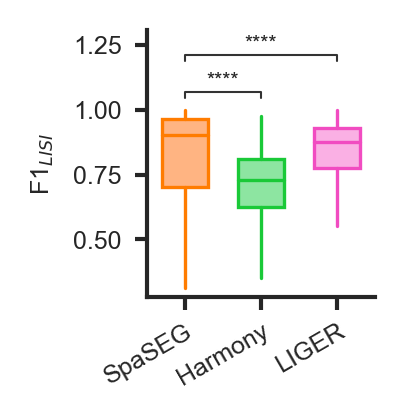

In [76]:
fig,ax = plt.subplots(figsize=(utils.centimeter*2.5, utils.centimeter*3))
axa=_boxplot(lisi_df, 'method', 'f1_lisi', method_list, ax, 
             bg_f[:len(method_list)], ln_f[:len(method_list)],
             comp_pairs = [("SpaSEG_embedding","X_Harmony"),("SpaSEG_embedding","H_liger")],showfliers=False)
ax.set_xticklabels(["SpaSEG",'Harmony','LIGER'])
ax.set_ylabel(r'F1$_{LISI}$')
plt.savefig(os.path.join(wk_root, f"notebook/results/Multisection/Supp_baseline_6972_F1LISI.pdf"), bbox_inches='tight', format='pdf', dpi=300)

## Sihouette Score

In [43]:
method_list=["SpaSEG_embedding","X_Harmony","H_liger"]
title_list=["SpaSEG",'Harmony','LIGER']
best_list=["SpaSEG_clusters","X_Harmony_leiden_0.65","H_liger_leiden_0.2"]


In [44]:
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import MinMaxScaler

In [222]:
# https://www.pnas.org/doi/10.1073/pnas.1820006116
def silhouette_coeff_ASW(adata, method_use='', percent_extract=0.8, batch_key='batch', domain_key='domain_cluster',n_iter=20):
    asw_b = []
    asw_ct = []
    _len = len(adata.obs_names)
    for i in range(n_iter):
        idxx = np.random.permutation(_len)
        rand_cidx = adata.obs_names[idxx[:int(_len*percent_extract)]]
        adata_ext = adata[rand_cidx,:]
        asw_batch = silhouette_score(adata_ext.obsm[method_use], adata_ext.obs[batch_key])
        asw_domain = silhouette_score(adata_ext.obsm[method_use], adata_ext.obs[domain_key])
        asw_b.append(asw_batch)
        asw_ct.append(asw_domain)
    
    df = pd.DataFrame({'asw_batch':asw_b, 'asw_domain': asw_ct})
    df['method_use']=method_use
    return df

In [45]:
# https://www.pnas.org/doi/10.1073/pnas.1820006116
def silhouette_coeff_point(adata, method_use='', batch_key='batch', domain_key='domain_cluster'):

    asw_batch = silhouette_samples(adata.obsm[method_use], adata.obs[batch_key])
    asw_domain = silhouette_samples(adata.obsm[method_use], adata.obs[domain_key])
    
    df = pd.DataFrame({'asw_batch':asw_batch, 'asw_domain': asw_domain})
    df['method_use']=method_use
    return df

In [46]:
df_spaseg=silhouette_coeff_point(adata, method_use='SpaSEG_embedding', batch_key='batch', domain_key='SpaSEG_clusters')
df_harmony=silhouette_coeff_point(adata, method_use='X_Harmony', batch_key='batch', domain_key='X_Harmony_leiden_0.65')
df_liger=silhouette_coeff_point(adata, method_use='H_liger', batch_key='batch', domain_key='H_liger_leiden_0.2')

In [47]:
# df_spaseg['asw_batch_norm'] = 1-(MinMaxScaler().fit_transform(df_spaseg[['asw_batch']].values)).squeeze()
# df_spaseg['asw_domain_norm'] = (MinMaxScaler().fit_transform(df_spaseg[['asw_domain']].values)).squeeze()

# df_harmony['asw_batch_norm'] = 1-(MinMaxScaler().fit_transform(df_harmony[['asw_batch']].values)).squeeze()
# df_harmony['asw_domain_norm'] = (MinMaxScaler().fit_transform(df_harmony[['asw_domain']].values)).squeeze()

# df_liger['asw_batch_norm'] = 1-(MinMaxScaler().fit_transform(df_liger[['asw_batch']].values)).squeeze()
# df_liger['asw_domain_norm'] = (MinMaxScaler().fit_transform(df_liger[['asw_domain']].values)).squeeze()

df_spaseg['asw_batch_norm'] = 1-(df_spaseg['asw_batch']+1)/2
df_spaseg['asw_domain_norm'] = (df_spaseg['asw_domain']+1)/2

df_harmony['asw_batch_norm'] = 1-(df_harmony['asw_batch']+1)/2
df_harmony['asw_domain_norm'] = (df_harmony['asw_domain']+1)/2

df_liger['asw_batch_norm'] = 1-(df_liger['asw_batch']+1)/2
df_liger['asw_domain_norm'] = (df_liger['asw_domain']+1)/2


In [48]:
df_asw = pd.concat([df_spaseg, df_harmony,df_liger])

In [49]:
df_asw['f1_asw'] = 2*df_asw['asw_batch_norm']*df_asw['asw_domain_norm']/(df_asw['asw_batch_norm']+df_asw['asw_domain_norm'])

In [50]:
df_asw

asw_batch  asw_domain        method_use  asw_batch_norm  \
0      -0.006503   -0.002818  SpaSEG_embedding        0.503251   
1       0.015281   -0.400151  SpaSEG_embedding        0.492359   
2      -0.008975    0.422498  SpaSEG_embedding        0.504488   
3       0.017636   -0.746250  SpaSEG_embedding        0.491182   
4       0.020363    0.773340  SpaSEG_embedding        0.489819   
...          ...         ...               ...             ...   
15279  -0.275219    0.675099           H_liger        0.637610   
15280  -0.164327    0.042959           H_liger        0.582164   
15281  -0.239968   -0.434577           H_liger        0.619984   
15282  -0.268667    0.686984           H_liger        0.634333   
15283  -0.239430    0.607888           H_liger        0.619715   

       asw_domain_norm    f1_asw  
0             0.498591  0.500910  
1             0.299925  0.372772  
2             0.711249  0.590286  
3             0.126875  0.201660  
4             0.886670  0.631037  
...                ...       ...  
15279         0.837549  0.724030  
15280         0.521480  0.550153  
15281         0.282712  0.388340  
15282         0.843492  0.724111  
15283         0.803944  0.699909  

[45852 rows x 6 columns]

In [51]:
df_asw[['f1_asw','method_use']].groupby(['method_use']).agg(['min','max','mean','median','std'])

f1_asw                                        
                       min       max      mean    median       std
method_use                                                        
H_liger           0.077170  0.741344  0.585977  0.609303  0.138047
SpaSEG_embedding  0.119716  0.720298  0.593526  0.627848  0.132514
X_Harmony         0.447734  0.555458  0.497813  0.493231  0.019574

In [52]:
df_asw.to_csv(os.path.join(wk_root, f"notebook/results/Multisection/6972_F1asw.csv"), index=False)

In [77]:
df_asw=pd.read_csv(os.path.join(wk_root, f"notebook/results/Multisection/6972_F1asw.csv"))

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

SpaSEG_embedding vs. X_Harmony: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:0.000e+00 U_stat=2.037e+08
SpaSEG_embedding vs. H_liger: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.038e-18 U_stat=1.101e+08


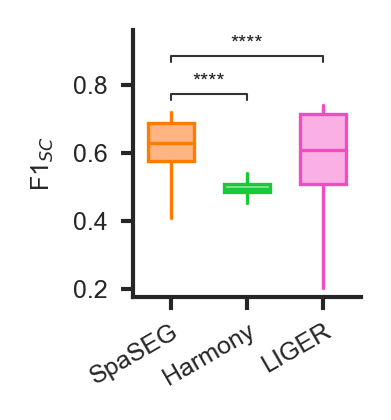

In [78]:
fig,ax = plt.subplots(figsize=(utils.centimeter*2.5, utils.centimeter*3))
axa=_boxplot(df_asw, 'method_use', 'f1_asw', method_list, ax, 
             bg_f[:len(method_list)], ln_f[:len(method_list)],
             comp_pairs = [("SpaSEG_embedding","X_Harmony"),("SpaSEG_embedding","H_liger")],showfliers=False)
ax.set_xticklabels(["SpaSEG",'Harmony','LIGER'])
ax.set_ylabel(r'F1$_{SC}$')
plt.savefig(os.path.join(wk_root, f"notebook/results/Multisection/Supp_baseline_6972_F1SC.pdf"), bbox_inches='tight', format='pdf', dpi=300)

# ARI

In [79]:
method_list=["SpaSEG_embedding","X_Harmony","H_liger"]
title_list=["SpaSEG",'Harmony','LIGER']
best_list=["SpaSEG_clusters","X_Harmony_leiden_0.65","H_liger_leiden_0.2"]
sample_ids = ['151669', '151670', '151671', '151672']

In [80]:
def ari_batch_domain(adata, method_use='', percent_extract=0.8, batch_key='batch', domain_key='domain_cluster',n_iter=20):
    ari_b = []
    ari_d = []
    _len = len(adata.obs_names)
    for i in range(n_iter):
        idxx = np.random.permutation(_len)
        rand_cidx = adata.obs_names[idxx[:int(_len*percent_extract)]]
        adata_ext = adata[rand_cidx,:]
        
        ground_truth = adata_ext.obs['celltype'].astype("category").cat.codes.values
        _batch = adata_ext.obs[batch_key].astype("category").cat.codes.values
        _clusters = adata_ext.obs[domain_key].values
        
        ari_batch = adjusted_rand_score(_batch,_clusters)
        ari_domain = adjusted_rand_score(ground_truth,_clusters)
        
        ari_b.append(ari_batch)
        ari_d.append(ari_domain)
    
    df = pd.DataFrame({'ari_batch':ari_b, 'ari_domain': ari_d})
    df['method_use']=method_use
    return df

In [81]:
df_spaseg=ari_batch_domain(adata, method_use='SpaSEG_embedding', percent_extract=0.8, batch_key='batch', domain_key='SpaSEG_clusters',n_iter=100)
df_harmony=ari_batch_domain(adata, method_use='X_Harmony', percent_extract=0.8, batch_key='batch', domain_key='X_Harmony_leiden_0.65',n_iter=100)
df_liger=ari_batch_domain(adata, method_use='H_liger', percent_extract=0.8, batch_key='batch', domain_key='H_liger_leiden_0.2',n_iter=100)

In [82]:
df_spaseg['ari_batch_norm'] = 1-df_spaseg['ari_batch']
df_spaseg['ari_domain_norm'] = df_spaseg['ari_domain']

df_harmony['ari_batch_norm'] = 1-df_harmony['ari_batch']
df_harmony['ari_domain_norm'] = df_harmony['ari_domain']

df_liger['ari_batch_norm'] = 1-df_liger['ari_batch']
df_liger['ari_domain_norm'] = df_liger['ari_domain']

In [83]:
df_ari = pd.concat([df_spaseg, df_harmony,df_liger])

In [84]:
df_ari['f1_ari'] = 2*df_ari['ari_batch_norm']*df_ari['ari_domain_norm']/(df_ari['ari_batch_norm']+df_ari['ari_domain_norm'])

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

SpaSEG_embedding vs. X_Harmony: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.562e-34 U_stat=1.000e+04
SpaSEG_embedding vs. H_liger: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.562e-34 U_stat=1.000e+04


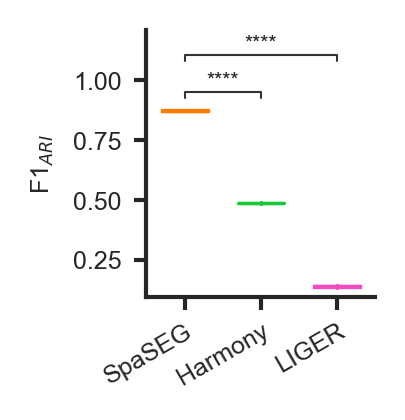

In [85]:
fig,ax = plt.subplots(figsize=(utils.centimeter*2.5, utils.centimeter*3))
axa=_boxplot(df_ari, 'method_use', 'f1_ari', method_list, ax, 
             bg_f[:len(method_list)], ln_f[:len(method_list)],
             comp_pairs = [("SpaSEG_embedding","X_Harmony"),("SpaSEG_embedding","H_liger")],showfliers=False)
ax.set_xticklabels(["SpaSEG",'Harmony','LIGER'])
ax.set_ylabel(r'F1$_{ARI}$')
plt.savefig(os.path.join(wk_root, f"notebook/results/Multisection/Supp_baseline_6972_F1ARI.pdf"), bbox_inches='tight', format='pdf', dpi=300)